In [1]:
#loading required R libraries 
library(ggplot2)
library(dplyr)
options(warn=-1)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#Load Covid Data
dfcovid <- read.csv(file = 'data/Covid19_6July/covid_19_data.csv', header = TRUE)
dfcovid <- subset(dfcovid, select =c(Date,Confirmed,Deaths,Recovered))
dfcovid <- dfcovid %>% group_by(Date) %>% summarise_all(sum)

head(dfcovid)


Date,Confirmed,Deaths,Recovered
2020-01-22,555,17,28
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,1438,42,39
2020-01-26,2118,56,52
2020-01-27,2927,82,61


In [3]:
#Read Stock Indices of Various Contries
dfChina<-read.csv(file = 'data/StockIndices/000001.SS.csv', header = TRUE)
dfUS<-read.csv(file = 'data/StockIndices/XAX.csv', header = TRUE)
dfRussia<-read.csv(file = 'data/StockIndices/IMOEX.ME.csv', header = TRUE)
dfJapan<-read.csv(file = 'data/StockIndices/N225.csv', header = TRUE)

#Select the Date and Stock Index value
dfUS <- subset(dfUS, select =c(Date,Adj.Close))
colnames(dfUS)[2]<-"US"
dfChina <- subset(dfChina, select =c(Date,Adj.Close))
colnames(dfChina)[2]<-"China"
dfRussia <- subset(dfRussia, select =c(Date,Adj.Close))
colnames(dfRussia)[2]<-"Russia"
dfJapan <- subset(dfJapan, select =c(Date,Adj.Close))
colnames(dfJapan)[2]<-"Japan"

merge1<-merge(dfUS,dfChina, by = c("Date"))
merge2<-merge(dfJapan,dfRussia, by = c("Date"))
dfstock<-merge(merge1,merge2, by = c("Date"))
#Display Stock Indices
head(dfstock)

Date,US,China,Japan,Russia
2020-01-22,2562.57,3060.755,24031.35,3174.62
2020-01-23,2558.51,2976.528,23795.44,3141.20
2020-02-03,2411.72,2746.606,22971.94,3070.84
2020-02-04,2420.82,2783.288,23084.59,3097.60
2020-02-05,2454.22,2818.088,23319.56,3114.25
2020-02-06,2433.50,2866.510,23873.59,3096.68


In [4]:
#Stock Indices dataset with Covid Dataset
dfmerge<-merge(dfstock,dfcovid, by = c("Date"))
head(dfmerge)

Date,US,China,Japan,Russia,Confirmed,Deaths,Recovered
2020-01-22,2562.57,3060.755,24031.35,3174.62,555,17,28
2020-01-23,2558.51,2976.528,23795.44,3141.20,653,18,30
2020-02-03,2411.72,2746.606,22971.94,3070.84,19881,426,623
2020-02-04,2420.82,2783.288,23084.59,3097.60,23892,492,852
2020-02-05,2454.22,2818.088,23319.56,3114.25,27636,564,1124
2020-02-06,2433.50,2866.510,23873.59,3096.68,30818,634,1487


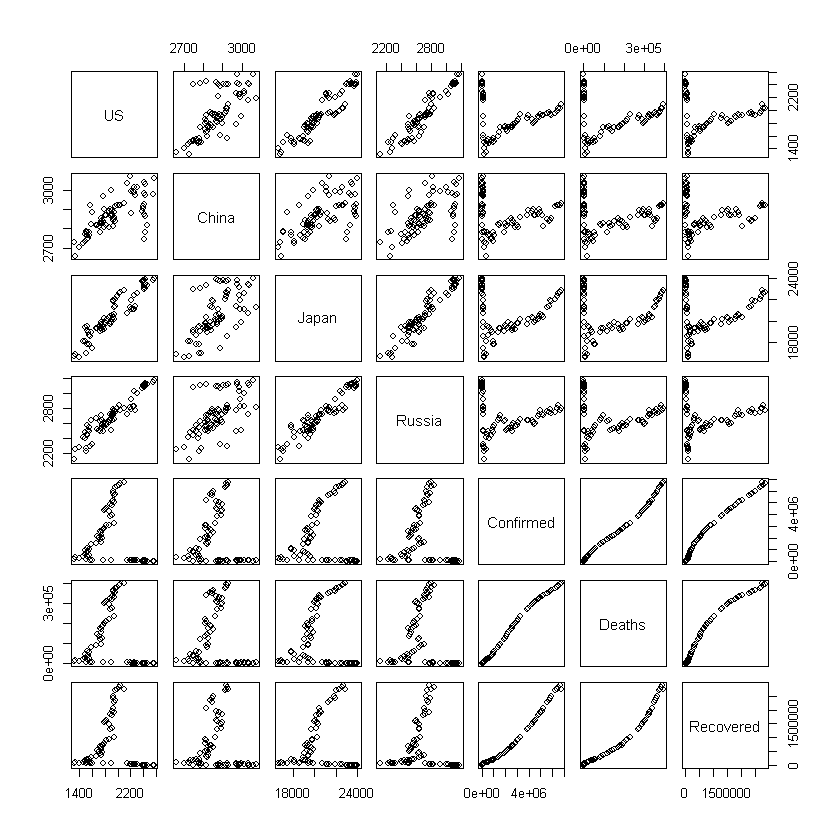

In [5]:
#Scatter Plot between Stock Indices & Covid Dataset
pairs(dfmerge[2:8], pch = 21)

In [6]:
#Correlation Between Stock Indices & Covid Cases
dfcor <- subset(dfmerge, select =-c(Date))
round(cor(dfcor),2)

,US,China,Japan,Russia,Confirmed,Deaths,Recovered
US,1.00,0.70,0.94,0.95,-0.15,-0.15,-0.08
China,0.70,1.00,0.63,0.59,-0.06,-0.06,0.00
Japan,0.94,0.63,1.00,0.95,0.03,0.02,0.10
Russia,0.95,0.59,0.95,1.00,-0.10,-0.10,-0.04
Confirmed,-0.15,-0.06,0.03,-0.10,1.00,1.00,0.99
Deaths,-0.15,-0.06,0.02,-0.10,1.00,1.00,0.97
Recovered,-0.08,0.00,0.10,-0.04,0.99,0.97,1.00
